In [1]:
# Tensorflow es una biblioteca de código abierto desarrollada por Google Brain, utilizada para el desarrollo de modelos de aprendizaje automático.
import tensorflow as tf
import pandas as pd
# Keras es una biblioteca de alto nivel para la construcción y formación de modelos de aprendizaje profundo. 
# Proporciona una interfaz intuitiva y fácil de usar sobre Tensorflow.
from tensorflow.keras.utils import plot_model # Importando plot_model para visualizar el modelo
from keras.models import Sequential, Model  # Importando las clases Sequential y Model para la construcción de modelos
from keras.layers import Dense, Dropout, Flatten, SpatialDropout2D, SpatialDropout1D, AlphaDropout  # Importando varias clases de capas
from keras.layers import Conv2D, MaxPooling2D  # Importando las capas Conv2D y MaxPooling2D para modelos de Convolutional Neural Networks (CNN)
from tensorflow.keras.layers import Input  # Importando la clase Input para la creación de modelos
from tensorflow.keras.optimizers import Adam  # Importando la clase Adam, un optimizador que se usa frecuentemente en redes neuronales
from keras.utils import to_categorical  # Utilidad para convertir un vector de clase (enteros) en una matriz de clase binaria
from keras.callbacks import EarlyStopping  # Permite parar el entrenamiento cuando una métrica deja de mejorar
from sklearn.model_selection import train_test_split
# Matplotlib es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.
from matplotlib import pylab  # Submódulo de matplotlib para trazar gráficos

# Bibliotecas y módulos estándar de Python para trabajar con archivos y números aleatorios
import random
import os

# SciPy es una biblioteca que contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales y de imagen, ODE y más.
from scipy.stats import entropy  # Importando la función de entropía

# Scikit-learn es una biblioteca de aprendizaje automático que proporciona una selección de algoritmos de clasificación, regresión y clustering eficientes.
from sklearn.metrics import f1_score, classification_report  # Importando métricas de rendimiento de modelos

# Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en Python y su extensión matemática NumPy.
import matplotlib.pyplot as plt

# NumPy es una biblioteca para el lenguaje de programación Python que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv', delimiter=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df =df.drop(['isFlaggedFraud','nameDest','nameOrig'],axis=1)
#datos filtrados para luego aplicar tecnica smote
df_f = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])].copy()
df_f['type'] = df_f['type'].apply(lambda x: 1 if x == 'TRANSFER' else 0)

In [5]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(3)
memory usage: 190.2 MB


In [6]:
df_f

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,1,181.00,181.00,0.0,0.00,0.00,1
3,1,0,181.00,181.00,0.0,21182.00,0.00,1
15,1,0,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,1,215310.30,705.00,0.0,22425.00,0.00,0
24,1,1,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,0,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,1,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,1,850002.52,850002.52,0.0,0.00,0.00,1


In [7]:
x = df_f.drop('isFraud',axis=1)
y_= df_f['isFraud']
X, X_test, Y, y_test= train_test_split(x, y_, test_size=0.3, stratify=y_, random_state=42)

In [8]:
import numpy as np
np.unique(Y,return_counts=True)

(array([0, 1], dtype=int64), array([1933537,    5749], dtype=int64))

In [10]:
X.shape

(1939286, 7)

In [ ]:
X_test.shape

(831123, 7)

In [ ]:
semilla=42

def reproducible_results(seed):  
    """
    Esta función configura las semillas de los generadores de números aleatorios en varias bibliotecas 
    para asegurar que los experimentos sean reproducibles.
    
    :param seed: El valor de la semilla a utilizar.
    """
    
    # Configura la semilla para el generador de números aleatorios en NumPy
    np.random.seed(seed)
    
    # Configura la semilla para el generador de números aleatorios en la biblioteca estándar de Python
    random.seed(seed)
    
    # Configura la semilla para el generador de números aleatorios en el entorno Python
    # Este es un intento de hacer que las funciones de hash sean deterministas en Python
    os.environ['PYTHONHASHSEED'] = str(0)
    
    # Configura la semilla para el generador de números aleatorios en TensorFlow
    tf.compat.v1.set_random_seed(seed)

In [ ]:
def get_dropout(input_tensor, p=0.5, mc=False, semilla=semilla):
    """
    Función para aplicar Dropout a una capa de entrada tensor.
    :param input_tensor: Tensor de entrada.
    :param p: Probabilidad de eliminar conexiones en el Dropout.
    :param mc: Booleano para activar el Dropout estocástico Monte Carlo.
    :param semilla: Semilla para reproducibilidad.
    :return: Tensor con Dropout aplicado.
    """
    if mc:
        return Dropout(p, seed=semilla)(input_tensor, training=True)
    else:
        return Dropout(p, seed=semilla)(input_tensor)
############
input_shape =(7,)
############
def get_model(mc=False, act="relu", input_shape=input_shape, seed=None):
    """
    Función para obtener el modelo de red neuronal para datos tabulados.
    :param mc: Booleano para activar el Dropout estocástico Monte Carlo.
    :param act: Función de activación a utilizar en las capas densas.
    :param input_shape: Forma de entrada de los datos al modelo.
    :param seed: Semilla para reproducibilidad.
    :return: Modelo de red neuronal compilado.
    """
    # Establecer reproducibilidad de resultados (si tienes una función para ello)
    # reproducible_results(seed)
    
    initializer = tf.keras.initializers.GlorotUniform(seed=seed)  # Inicializador para los pesos de las capas
    inp = Input(shape=input_shape)  # Capa de entrada del modelo
    
    x = Dense(128, activation=act, kernel_initializer=initializer)(inp)  # Capa densa 1
    x = Dropout(0.25)(x) if mc else x  # Capa de Dropout aplicada al tensor x
    x = Dense(64, activation=act, kernel_initializer=initializer)(x)  # Capa densa 2
    x = Dropout(0.5)(x) if mc else x  # Capa de Dropout aplicada al tensor x
    
    out = Dense(1, activation='sigmoid', kernel_initializer=initializer)(x)  # Capa de salida con activación sigmoid
    
    model = Model(inputs=inp, outputs=out)  # Crear el modelo de red neuronal
    
    model.compile(loss='binary_crossentropy',  # Compilar el modelo con función de pérdida, optimizador y métricas
                optimizer='adam',
                metrics=['accuracy'])
    return model

## ***Vista del modelo***

C:\Users\Ivan\AppData\Roaming\Python\Python39\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


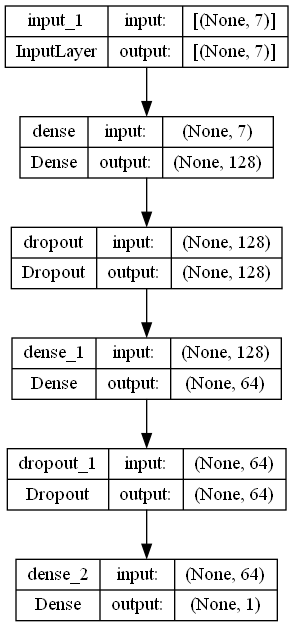

In [ ]:
model = get_model(mc=True, act="relu")
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# ***Tecnica de Submuestreo (Undersampling)***

In [ ]:
def get_data(x_training, y_training, examples_per_clase, nclasses=6):
    """
    Función para obtener un subconjunto de datos de entrenamiento balanceado.
    :param x_training: Conjunto de datos de entrenamiento.
    :param y_training: Etiquetas correspondientes al conjunto de datos de entrenamiento.
    :param examples_per_clase: Número de ejemplos por clase que se desea obtener.
    :param nclasses: Número de clases en el conjunto de datos.
    :return: Conjunto de datos de entrenamiento original sin los ejemplos seleccionados, subconjunto de datos balanceado.
    """
    x_training = x_training.copy()
    y_training = y_training.copy()
    
    # Verificar si x_training y y_training son DataFrames/Series de pandas
    if isinstance(x_training, pd.DataFrame) and isinstance(y_training, pd.Series):
        for i in range(nclasses):
            idx = y_training[y_training == i].index[:examples_per_clase]
            if i == 0:
                x = x_training.loc[idx].values.copy()
                y = y_training.loc[idx].values.copy()
            else:
                x = np.vstack((x, x_training.loc[idx].values))
                y = np.hstack((y, y_training.loc[idx].values))
            x_training = x_training.drop(idx)
            y_training = y_training.drop(idx)
    else:
        for i in range(nclasses):
            idx = np.where(y_training == i)[0][:examples_per_clase]
            if i == 0:
                x = x_training[idx].copy()
                y = y_training[idx].copy()
            else:
                x = np.vstack((x, x_training[idx]))
                y = np.hstack((y, y_training[idx]))
            x_training = np.delete(x_training, idx, axis=0)
            y_training = np.delete(y_training, idx, axis=0)

    return x_training, y_training, x, y

## ***Re-entrenamiento (self-training)***

In [ ]:
from sklearn.metrics import classification_report, f1_score
from matplotlib import pylab

def numerode_veces(veces, batch, xu, xl, yl, model, test_data, test_labels):
    fscore = []  # Lista para almacenar los puntajes F1
    cantidad_de_datos = []  # Lista para almacenar la cantidad de datos etiquetados
    for i in range(veces):
        print("Posicion de numero de veces", i + 1)
        print("Datos etiquetados ", xl.shape[0])
        print("Datos sin etiqueta: ", xu.shape[0])
        cantidad_de_datos.append(xl.shape[0])
        print(f"Cantidad de datos etiquetados {cantidad_de_datos}")
        
        h = model.fit(xl, yl,  # Entrenar el modelo con los datos etiquetados
                    batch_size=batch,
                    epochs=100,
                    verbose=0)
        
        pred = model.predict(test_data)  # Realizar predicciones en los datos de prueba
        pred_labels = (pred > 0.5).astype(int)  # Convertir las predicciones a etiquetas binarias
        f1score = 100 * f1_score(test_labels, pred_labels, average='weighted')  # Calcular el puntaje F1
        fscore.append(f1score)  # Agregar el puntaje F1 a la lista
        
        predxu = model.predict(xu)  # Realizar predicciones en los datos sin etiqueta
        idxx = np.argsort(predxu[:, 0])[-batch:]  # Obtener los índices de los datos con mayor probabilidad de ser fraude
        ylaux = (predxu[idxx, 0] > 0.5).astype(int)  # Obtener las etiquetas correspondientes
        xlaux = xu.iloc[idxx]  # Obtener los datos correspondientes
        xl = np.vstack((xl, xlaux))  # Agregar los datos etiquetados
        yl = np.hstack((yl, ylaux))  # Agregar las etiquetas
        xu = pd.DataFrame(np.delete(xu.values, idxx, axis=0), columns=xu.columns)  # Eliminar los datos etiquetados de los datos sin etiqueta
        
        print(fscore)
        print(classification_report(test_labels, pred_labels))  # Imprimir el informe de clasificación
    # Mostrar gráfica de puntajes F1 vs cantidad de datos etiquetados
    fig = pylab.figure(1, figsize=(10, 10))
    pylab.plot(cantidad_de_datos, fscore, 'orange', label='score vs data training')
    pylab.legend(loc='upper left')
    pylab.show()
    

## ***Entrenamiento y visualizacion***

In [ ]:
#ejemplos por clase (training)
examples_train = 20000
x_training, y_training, xl, yl = get_data(X, Y, examples_train)
print('train x:', xl.shape)  # Imprimir la forma del conjunto de entrenamiento balanceado
print('train y:', yl.shape)  # Imprimir la forma de las etiquetas correspondientes

#ejemplos por clase (validation)
examples_validation = 2000  
x_training, y_training, xv, yv = get_data(x_training, y_training, examples_validation)
print('val x:', xv.shape)  # Imprimir la forma del conjunto de validación balanceado
print('val y:', yv.shape)  # Imprimir la forma de las etiquetas correspondientes

#data sin etiquetas (unlabeled)
xu = x_training.copy()  # Copiar el conjunto de datos de entrenamiento restante como datos sin etiquetas
del y_training  # Eliminar las etiquetas del conjunto de entrenamiento original
print('unlabeled x:', xu.shape)  # Imprimir la forma de los datos sin etiquetas

train x: (25749, 7)
train y: (25749,)
val x: (2000, 7)
val y: (2000,)
unlabeled x: (1911537, 7)


In [ ]:
np.unique(yl, return_counts=True)

(array([0, 1], dtype=int64), array([20000,  5749], dtype=int64))

Posicion de numero de veces 1
Datos etiquetados  25749
Datos sin etiqueta:  1911537
Cantidad de datos etiquetados [25749]
59736/59736 [==============================] - 40s 667us/step
[99.55785832752821]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.89      0.00      0.01      2464

    accuracy                           1.00    831123
   macro avg       0.94      0.50      0.50    831123
weighted avg       1.00      1.00      1.00    831123

Posicion de numero de veces 2
Datos etiquetados  25849
Datos sin etiqueta:  1911437
Cantidad de datos etiquetados [25749, 25849]
59733/59733 [==============================] - 40s 677us/step
[99.55785832752821, 99.56149418727954]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       1.00      0.01      0.02      2464

    accuracy                           1.00    831123
   macro avg       1.

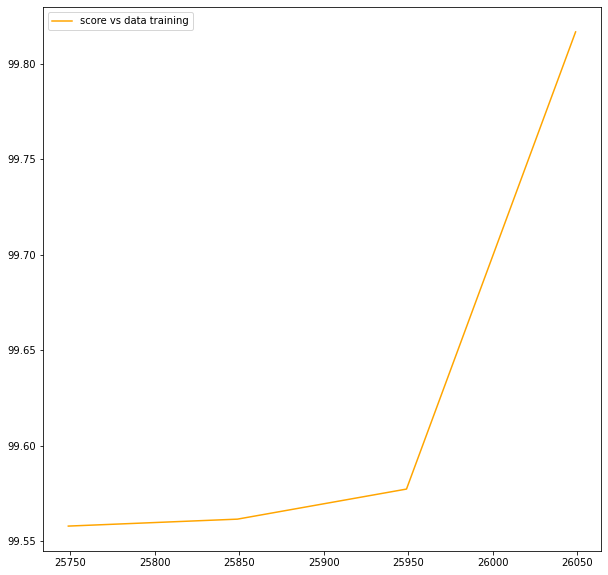

In [ ]:
batch = 100 #Datos confiables para agregar a la iteracion
numerode_veces(4,batch,xu,xl,yl,model=model,test_data=X_test,test_labels=y_test)

In [ ]:
#ejemplos por clase (training)
examples_train = 2000
x_training, y_training, xl, yl = get_data(X, Y, examples_train)
print('train x:', xl.shape)  # Imprimir la forma del conjunto de entrenamiento balanceado
print('train y:', yl.shape)  # Imprimir la forma de las etiquetas correspondientes
#ejemplos por clase (validation)
examples_validation = 200  # Número de ejemplos POR CLASE para el conjunto de validación
x_training, y_training, xv, yv = get_data(x_training, y_training, examples_validation)
print('val x:', xv.shape)  # Imprimir la forma del conjunto de validación balanceado
print('val y:', yv.shape)  # Imprimir la forma de las etiquetas correspondientes
#data sin etiquetas (unlabeled)
# xu = x_training.copy()  # Copiar el conjunto de datos de entrenamiento restante como datos sin etiquetas
del y_training  # Eliminar las etiquetas del conjunto de entrenamiento original
print('unlabeled x:', xu.shape)  # Imprimir la forma de los datos sin etiquetas"

Posicion de numero de veces 1
Datos etiquetados  4000
Datos sin etiqueta:  1934886
Cantidad de datos etiquetados [4000]
60466/60466 [==============================] - 40s 667us/step
[99.78870929746057]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.78      0.50      0.61      2464

    accuracy                           1.00    831123
   macro avg       0.89      0.75      0.80    831123
weighted avg       1.00      1.00      1.00    831123

Posicion de numero de veces 2
Datos etiquetados  4100
Datos sin etiqueta:  1934786
Cantidad de datos etiquetados [4000, 4100]
60463/60463 [==============================] - 46s 760us/step
[99.78870929746057, 99.78406821624884]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.76      0.50      0.60      2464

    accuracy                           1.00    831123
   macro avg       0.88   

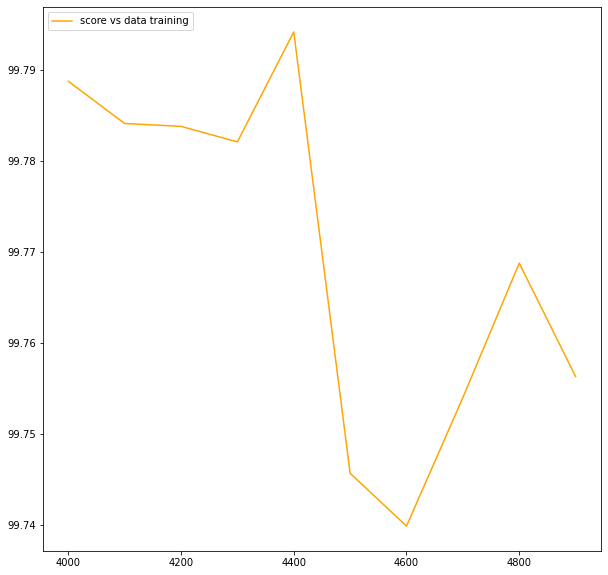

In [ ]:
#examples_train = 2000
#examples_validation = 200

#(array([0, 1], dtype=int64), array([2000, 2000], dtype=int64))

# 50% de no fraude y 50% de fraudes
batch = 100 #Datos confiables para agregar a la iteracion
numerode_veces(10,batch,xu,xl,yl,model=model,test_data=X_test,test_labels=y_test)